# 모두의 딥러닝 둘째 마당 예측 모델의 기본 원리
## 4장 가장 훌륭한 예측선

### 1. 선형 회귀의 정의

딥러닝을 이해하려면 딥러닝의 가장 말단에서 이루어지는 기본적인 두 가지 계산 원리 **선형 회귀**와 **로지스틱 회귀**를 알아야 합니다.

- 선형 회귀란 독립 변수 $x$를 사용해 종속 변수 $y$의 움직임을 예측하고 설명하는 작업을 의미합니다.
- 하나의 $x$ 값만으로도 $y$ 값을 설명할 수 있으면 **단순 선형 회귀**, $x$값이 여러 개 필요하다면 **다중 선형 회귀**라고 부릅니다.

### 2. 가장 훌륭한 예측선이란?
 
$$y = ax + b$$

- 선형 회귀란 위의 함수에서 최적의 $a$(직선의 기울기)와 $b$($y$절편) 값을 찾아내는 것입니다.
- 기존의 데이터로 예측선을 그리고, 거기에 답이 나오지 않은 값을 대입해 예측값을 구하는 것이 선형 회귀라고 할 수 있습니다.

### 3. 최소 제곱법

**최소 제곱법**을 통해 일차 함수의 기울기와 $y$ 절편을 바로 구할 수 있습니다.

$$a = \frac{(x - x 평균)(y - y 평균) 의 합}{(x - x 평균)^2 의 합}$$

### 4. 파이썬 코딩으로 확인하는 최소 제곱

In [3]:
import numpy as np

# 공부한 시간과 점수를 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# x 원소들의 평균값, y 원소들의 평균값을 구합니다.
mx = np.mean(x)
my = np.mean(y)

# 최소 제곱법의 분모를 구합니다.
divisor = sum([ (i - mx) ** 2 for i in x ])
# 최소 제곱법의 분자를 구합니다. 함수 top()을 사용합니다.
def top(x, mx, y, my):
    d = 0
    # 참고: range() 는 입력한 인자(숫자) 바로 전까지 연속적인 숫자 객체를 만듭니다.
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my) # (x−x평균)(y−y평균)
    return d
dividend = top(x, mx, y, my)

# 기울기 a 를 구합니다.
a = dividend / divisor
# y 절편 b 를 구합니다.
b = my - (mx * a)

print('기울기 a =', a)
print('y 절편 b =', b)

기울기 a = 2.3
y 절편 b = 79.0


### 5. 최소 제곱 오차

실제 데이터에서는 여러 개의 입력 값을 사용하기에 최소 제곱법만으로는 한계가 있습니다. 최소 제곱법이 아닌 다른 방법으로는 우선 가설을 세우고(임의로 선을 긋고), 오차가 최소가 될 때까지 값에 조금씩 변화를 주는 작업을 반복하는 것입니다.

새로 그은 선이 이전의 선보다 오차가 적은지를 평가하는 방법 중에서 가장 많이 사용하는 방법이 **평균 제곱 오차**입니다.

$$ 오차 = 실제 값 - 예측 값 $$

이렇게 구한 오차는 양수, 음수가 섞여 있기 때문에 각 오차의 값을 제곱하여 더합니다.

$$ 오차의 합 = \sum^{n}_{i}(y_{i} - \hat y_{i})  $$

- $i$는 $x$가 나오는 순서를, $n$은 $x$ 원소의 총 개수입니다. $y_{i}$는 실제 값, $\hat y_{i}$은 예측 값입니다.

**선형 회귀**란 임의의 직선을 그어 이에 대한 평균 제곱 오차를 구하고, 이 값을 가장 작게 만들어 주는 $a$값과 $b$값을 찾아가는 작업입니다.

### 6. 파이썬 코딩으로 확인하는 평균 제곱 오차

In [4]:
# 임의의 직선을 그어봅니다.
fake_a = 3
fake_b = 76

# 임의의 직선에 대한 예측 값을 구합니다.
def predict(x):
    return fake_a * x + fake_b
predict_result = []
for i in range(len(x)):
    predict_result.append( predict(x[i]) )
    print( "공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict( x[i] )) )

# 평균 제곱 오차를 구합니다.
n = len(x)
def mse(y, y_pred):
    return (1 / n) * sum( (y - y_pred) ** 2 )

print('평균 제곱 오차:' + str( mse(y, predict_result) ))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
평균 제곱 오차:11.0


## 5장. 선형 회귀 모델: 먼저 긋고 수정하기

기울기 $a$ 와 오차는 이차 함수의 관계가 있습니다. 적절한 기울기를 찾았을 때 오차가 최소화됩니다.

### 1. 경사 하강법의 개요

최소값 $m$을 대입해 순간 기울기가 0인 점을 찾는 것이 목적인데, 이 말은 즉 "미분 값이 0인 지점"을 찾는 것입니다.

1. $a_1$에서 미분을 구합니다.
2. 구한 기울기의 반대 방향으로 이동한 $a_2$에서 미분을 구합니다.
3. 2에서 구한 미분 값이 0이 될 때까지 위의 과정을 반복합니다.

여기서 중요한 것은 **학습률**으로, 2번에서 어느 정도로 이동시킬 것인지 그 이동 거리를 정해주는 것을 말합니다. 학습률을 적절히 바꾸면서 최적의 학습률을 찾는 것은 중요한 최적화 과정 중 하나입니다.

즉, 경사 하강법은 오차의 변화에 따라 이차 함수 그래프를 만들고, 적절한 학습률을 설정해 미분 값이 0인 지즘을 구하는 것입니다.($y$절편 $b$도 최적의 값을 구할 때 경사 하강법을 사용합니다.)

### 2. 파이썬 코딩으로 확인하는 선형 회귀

평균 제곱 오차의 식에서, $\hat y_{i}$를 $\hat y_{i}=ax_{i} + b$로 대입하면 다음과 같이 바뀝니다.

$$ 평균 제곱 오차 = \sum^{n}_{i}( y_{i} - (ax_{i} + b) )  $$

궁금한 것은 a, b 이기에 각각 편미분을 해보면 다음과 같습니다.

a 로 편미분한 결과 $ = \frac{2}{n} \sum -x_{i}(y_{i} - (ax_{i} + b)) $

b 로 편미분한 결과 $ = \frac{2}{n} \sum -(y_{i} - (ax_{i} + b)) $


기울기=2.3000, 절편=79.0000


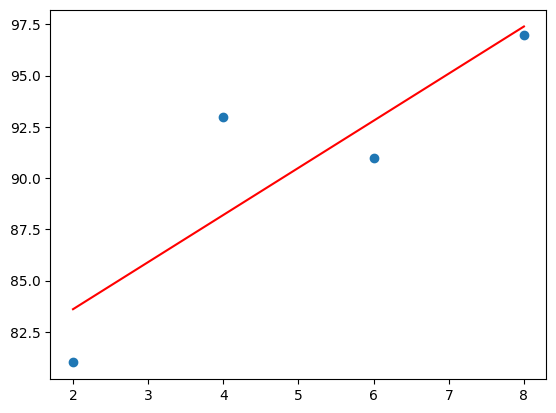

In [8]:
import matplotlib.pyplot as plt

# 기울기 a 와 절편 b 를 초기화합니다.
a = 0
b = 0
# 학습률을 임의로 정합니다. 앞으로 딥러닝 프로젝트는 자동으로 최적의 학습률을 찾아주는 알고리즘을 사용할 것입니다.
lr = 0.03
# 반복할 확수를 설정합니다.
epochs = 2001

n = len(x)
# 경사하강법을 시작합니다.
for i in range(epochs):
    y_pred = a * x + b # 예측 값을 구하는 식
    error = y - y_pred # 오차
    a_diff = (2/n) * sum(-x * error) # 오차 함수를 a 로 편미분한 값
    b_diff = (2/n) * sum(-error) # 오차 함수를 b 로 편미분한 값
    # 학습률을 곱해 기존의 a, b 값을 갱신
    a = a - lr * a_diff
    b = b - lr * b_diff

    # if i % 100 == 0:
        # print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
print("기울기=%.04f, 절편=%.04f" % (a, b))
# a, b 값을 대입해 그래프를 그립니다.
y_pred = a * x + b

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show()


### 3. 다중 선형 회귀의 개요

정보를 추가해 새로운 예측 값을 구하려면, 변수의 개수를 늘려 **다중 선형 회귀**를 만들어야 합니다.

$$ y = a_{1}x_{1} + a_{2}x_{2} + b $$

경사 하강법을 그대로 적용해 두 개의 기울기를 구할 수 있습니다.

### 4. 파이썬 코딩으로 확인하는 다중 선형 회귀

그래프를 보면, 새로운 변수의 추가로 차원이 추가되면서, 계산이 복잡해지고 더 많은 데이터를 필요로 하게 됩니다.

In [9]:
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 표시
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(x1, x2, y)
# plt.show()

# 기울기 a 와 절편 b 를 초기화합니다.
a1 = 0
a2 = 0
b = 0

lr = 0.01 # 학습률
epochs = 2001 # 반복할 횟수
n = len(x1)

# 경사 하강법을 시작합니다.
for i in range(epochs):
    y_pred = a1 * x1 + a2 * x2 + b # 예측 값을 구하는 식
    error = y - y_pred # 실제 값과 비교한 오차

    a1_diff = ( 2/n ) * sum( -x1 * error ) # 오차 함수를 a1 으로 편미분한 값
    a2_diff = ( 2/n ) * sum( -x2 * error ) # 오차 함수를 a2 으로 편미분한 값
    b_diff = ( 2/n ) * sum( -error ) # 오차 함수를 b 로 편미분한 값
    # 학습률을 곱해 기존의 a1, a2, b 값을 갱신
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b = b - lr * b_diff

    # if i % 100 == 0:
        # print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
print("기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (a1, a2, b))
print('실제 점수: ', y)
print('예측 점수: ', y_pred)
    

기울기1=1.5191, 기울기2=2.2923, 절편=77.7260
실제 점수:  [81 93 91 97]
예측 점수:  [80.76387645 92.97153922 91.42520875 96.7558749 ]


### 5. 텐서플로에서 실행하는 선형 회귀, 다중 선형 회귀 모델

머신 러닝에서는 위의 용어를 약간 다르게 부릅니다.

- 문제를 해결하기 위해 가정하는 식을 *가설 함수*라 부르며 $H(x)$라고 표기합니다.
- 기울기 $a$는 **가중치**라고 부르며, $w$라고 표시합니다.
- 절편 $b$는 **편향**이라 하며, $b$로 표시합니다.
- 또한 평균 제곱 오차처럼 실제 값과 예측 값 사이의 오차에 대한 식을 *손실 함수*라 부릅니다.
- 최적의 기울기와 절편을 찾기 위한 방법을 딥러닝에서는 **옵티마이저**라 부릅니다.
    - 경사 하강법은 옵티마이저 중 하나입니다.

1/1 [==============================] - 0s 89ms/step


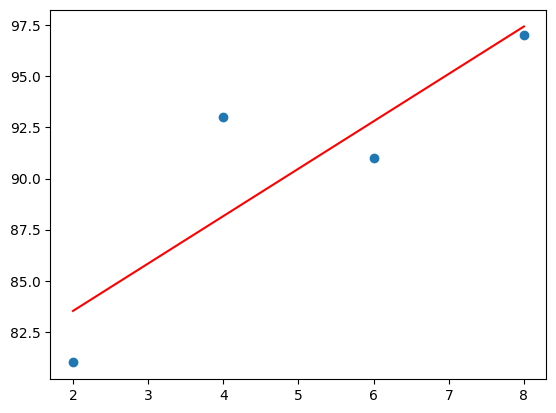

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

model = Sequential()

# 가설 함수는 wx + b 입니다.
# 모델을 설정합니다.
model.add(Dense( 1, input_dim=1, activation='linear' )) # 출력할 값이 1개, 입력할 변수 1개, 입력값을 다음 층으로 넘길 때의 처리할 방법을 결정하는 활성화 함수는 선형 회귀('linear')
model.compile( optimizer='sgd', loss='mse' ) # 옵티마이저는 경사 하강법('sgd'), 손실 함수는 평균 제곱 오차('mse')
model.fit( x, y, epochs=2000, verbose=0 ) # 2000번 반복하여 학습
# 예측 결과를 그래프로 표시합니다.
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()


In [16]:
# 다중 선형 회귀인 경우
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 

model = Sequential()
model.add( Dense( 1, input_dim=2, activation='linear' ) )
model.compile(optimizer='sgd' ,loss='mse')
model.fit(x, y, epochs=2000, verbose=0)
# 임의의 값을 입력
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print('%.f시간을 공부하고, %.f시간의 과외를 받을 경우의 예상 점수는 %.02f점입니다.' % (hour, private_class, prediction))

1/1 [==============================] - 0s 63ms/step
7시간을 공부하고, 4시간의 과외를 받을 경우의 예상 점수는 97.53점입니다.


## 6장. 로지스틱 회귀 모델: 참 거짓 판단하기

### 1. 로지스틱 회귀의 정의

참 1, 거짓 0 을 구해야 할 때, 0과 1 사이에 다른 값이 없어 직선으로 그리기 어렵습니다. 이럴 때 로지스틱 회귀를 사용해 S자 형태의 선을 그려줄 수 있습니다.

### 2. 시그모이드 함수

시그모이드 함수를 이용해 로지스틱 회귀를 풀 수 있습니다.

$$ y = \frac{1}{1 + e^{-(ax + b)}} $$

여기서도 a, b 값을 구해야 합니다.

- a 는 그래프의 경사도를 결정합니다. 경사도와 a 값은 비례합니다.
    - a 값이 작아지면 오차는 무한대로 커지지만, a 값이 커져도 오차는 무한대로 커지지 않습니다.
- b 는 그래프의 좌우 이동을 의미합니다.
    - b 값은 이차 함수 그래프와 유사한 형태로 나타납니다. (작을 때와 클 떄의 오차 값이 동일합니다.)

### 3. 오차 공식

경사 하강법을 이용해 a, b 값을 구할 수 있지만, 오차를 구하는 공식은 평균 제곱 오차를 사용하기 어렵습니다. (0과 1 사이에 값이 없어서) 대신 로그 함수를 사용합니다.

### 4. 로그 함수

$$ - {y \log h + (1 - y)\log (1 - h) } $$

실제 값을 $y$라 할 때, $y$값이 1이면 $(1 - y)\log (1 - h)$이 없어집니다. 반대로 0이면 $y \log h$부분이 없어집니다.

그래서 실제 값에 따라 두 개의 그래프 $(1 - y)\log (1 - h)$, 그리고 $y \log h$ 을 각각 사용할 수 있습니다. 

이러한 손실 함수를 **교차 엔트로피 오차** 함수라 부릅니다. 

### 5. 텐서플로에서 실행하는 로지스틱 회귀 모델

1/1 [==============================] - 0s 113ms/step


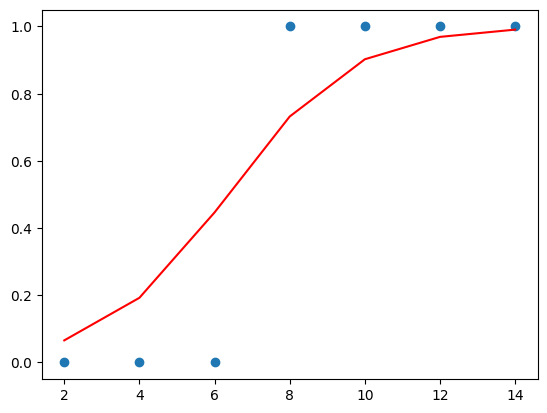

In [17]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1]) 

# 모델을 설정합니다.
model = Sequential()
model.add(Dense( 1, input_dim=1, activation='sigmoid' )) # 시그모이드 함수를 사용합니다.
model.compile(optimizer='sgd', loss='binary_crossentropy') # 옵티마이저는 경사 하강법('sgd'), 손실 함수는 교차 엔트로피 오차 함수('binary_crossentropy')를 사용합니다.
model.fit(x, y, epochs=5000, verbose=0)

plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

In [18]:
# 임의의 학습 시간을 넣어 예측하기
hour = 7
prediction = model.predict([hour])
print('%.f시간을 공부할 경우, 합격 예상 확률은 %.01f점입니다.' % (hour, prediction * 100))

1/1 [==============================] - 0s 38ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.8점입니다.
